Homework 11
====
#### CHE 116: Numerical Methods and Statistics
Version 1.0 (3/14/2016)

----

Problem 1 (100 Points)
====

Write a module to package your CHE 116 methods. You will create two files: `stats.py` and `regression.py`. Your `stats.py` file will contain the confidence interval function from Unit 13, Lecture 1. You will write two regression functions in `regression.py`: `linear_regress` and `nonlinear_regress`. Here are their attributes:

`linear_regress`:
  1. Takes in an x matrix of data and y values
  3. Performs a regression and return standard errors of the fit coefficients and standard error in residual
  2. Takes in a True/False variable which indicates whether or not to create plots
  3. If creating plots, it should create a single plot (!) with as many subplots as needed to justify the regression
  4. Takes in a pvalue variable, which if True computes and returns $p$-values for each of the coefficients using a t-test hypothesis test
  
`nonlinear_regress`:
  1. Takes in an x matrix of data, a function which takes in (beta, x, y), an initial guess for beta, and y values
  3. Performs a regression and return standard errors of the fit coefficients and standard error in residual
  2. Takes in a True/False variable which indicates whether or not to create plots
  3. If creating plots, it should create a single plot (!) with as many subplots as needed to justify the regression
  4. Takes in a pvalue variable, which if True computes and returns $p$-values for each of the coefficients using a t-test hypothesis test
  5. Take in a nonconvex variable, which if True causes the method to use basin_hopping for minimizing SSR
  
You should be able to install your resulting CHE 116 module using the `pip` command as shown in lecture. 

----

I have been intentionally vague on the specifications. It is up to you to write detailed documentation and specifications about your function. You will be graded according to the following:

1. Your module can be installed and imported [20 Points]
2. Your module and functions are well-documented, including examples, returns and parameters descriptions. [20 Points]
3. Your functions behave correctly on usual data and perform plots/statistics [50 Points]
4. Your functions respond gracefully to bad inputs and give warnings/notice if it fails to fit for any reason [10 Points]

----

**You should submit a zipped folder containing your module and notebook demonstrating how to use your function.**

Useful code snippets
----

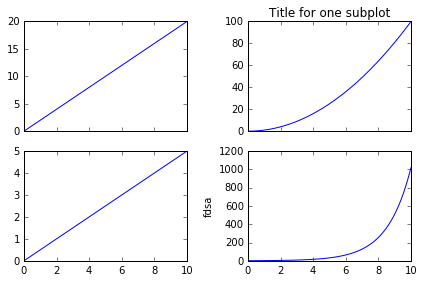

In [20]:
#making subplots
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0,10, 0.01)

#share x-axis and make a 2x2 grid of plots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)

#index the axs to make individual plots
axs[0,0].plot(x, 2 * x)
axs[0,1].plot(x, x**2)
axs[1,1].plot(x, 2**x)
axs[1,0].plot(x, x / 2)

#can add labeles
axs[1,1].set_ylabel('fdsa')
axs[0,1].set_title('Title for one subplot')

#if you add labels, calling this method will spread out subplots until they fight
fig.tight_layout()

plt.show()

In [22]:
#compute numerical derivatives - need package
%system pip install numdifftools

['Collecting numdifftools',
 '  Downloading numdifftools-0.9.14-py2.py3-none-any.whl (2.4MB)',
 'Requirement already satisfied (use --upgrade to upgrade): setuptools>=9.0 in /opt/conda/lib/python3.5/site-packages/setuptools-20.3-py3.5.egg (from numdifftools)',
 'Requirement already satisfied (use --upgrade to upgrade): scipy>=0.8 in /opt/conda/lib/python3.5/site-packages (from numdifftools)',
 'Requirement already satisfied (use --upgrade to upgrade): numpy>=1.9 in /opt/conda/lib/python3.5/site-packages (from numdifftools)',
 'Collecting algopy>=0.4 (from numdifftools)',
 '  Downloading algopy-0.5.3.tar.gz (149kB)',
 'Building wheels for collected packages: algopy',
 '  Running setup.py bdist_wheel for algopy: started',
 "  Running setup.py bdist_wheel for algopy: finished with status 'done'",
 '  Stored in directory: /home/jovyan/.cache/pip/wheels/2b/8f/59/339705f81a54b6f7e8731653bfc23c12e2d2111dfaadc52400',
 'Successfully built algopy',
 'Installing collected packages: algopy, numdif

In [38]:
#create a function
def fxn(beta, x):
    return x * beta[0]**2 + x * beta[1]

In [45]:
import numdifftools as nd

#get derivative wrt to beta
df = nd.Gradient(fxn)

#get some x-values to evaluate function
x = np.arange(0,10, 0.1)

#compute df/dbeta using gradient
df_dbeta = df([1,1], x)